In [ ]:
from google.colab import files
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal
from scipy.stats import ks_2samp
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['owid-covid-data.csv']))

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=df.fillna(0)
df_ind = df.loc[df["location"] == "India"]
df_sa = df.loc[df["location"] == "South Africa"]
df_zim = df.loc[df["location"] == "Zimbabwe"]
df_afg = df.loc[df["location"] == "Afghanistan"]
df_us = df.loc[df["location"] == "United States"]
df_uk = df.loc[df["location"] == "United Kingdom"]
df_ger = df.loc[df["location"] == "Germany"]
df_ind=df_ind.iloc[:,[3,5]]
df_sa=df_sa.iloc[:,[3,5]]
df_zim=df_zim.iloc[:,[3,5]]
df_afg=df_afg.iloc[:,[3,5]]
df_us=df_us.iloc[:,[3,5]]
df_uk=df_uk.iloc[:,[3,5]]
df_ger=df_ger.iloc[:,[3,5]]

In [ ]:
df_zim=df_zim.iloc[:600,:]
df_sa=df_sa.iloc[:650,:]
df_afg=df_afg.iloc[:600,:]
df_us=df_us.iloc[:680,:]
df_uk=df_uk.iloc[:580,:]
df_ger=df_ger.iloc[:550,:]

In [ ]:
df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

In [ ]:
m,d,y=df_ind.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ind.index.max()+1):
  m1,d1,y1=df_ind.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ind.iloc[i,0]=(date1-date0).days
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
df_ind['new_cases']=df_ind['new_cases'].astype(int)

m,d,y=df_sa.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_sa.index.max()+1):
  m1,d1,y1=df_sa.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_sa.iloc[i,0]=(date1-date0).days
  if df_sa.iloc[i,1]==0:
    df_sa.iloc[i,1]=(df_sa.iloc[i-1,1]+df_sa.iloc[i+1,1])/2
df_sa['new_cases']=df_sa['new_cases'].astype(int)

m,d,y=df_zim.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_zim.index.max()+1):
  m1,d1,y1=df_zim.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_zim.iloc[i,0]=(date1-date0).days
  if df_zim.iloc[i,1]==0:
    df_zim.iloc[i,1]=df_zim.iloc[i+1,1]/2
    df_zim.iloc[i+1,1]=df_zim.iloc[i+1,1]-df_zim.iloc[i,1]
df_zim['new_cases']=df_zim['new_cases'].astype(int)

m,d,y=df_afg.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_afg.index.max()+1):
  m1,d1,y1=df_afg.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_afg.iloc[i,0]=(date1-date0).days
  if df_afg.iloc[i,1]==0:
    df_afg.iloc[i,1]=(df_afg.iloc[i-1,1]+df_afg.iloc[i+1,1])/2
df_afg['new_cases']=df_afg['new_cases'].astype(int)

m,d,y=df_us.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_us.index.max()+1):
  m1,d1,y1=df_us.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_us.iloc[i,0]=(date1-date0).days
  if df_us.iloc[i,1]==0:
    df_us.iloc[i,1]=(df_us.iloc[i-1,1]+df_us.iloc[i+1,1])/2
df_us['new_cases']=df_us['new_cases'].astype(int)

m,d,y=df_uk.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_uk.index.max()+1):
  m1,d1,y1=df_uk.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_uk.iloc[i,0]=(date1-date0).days
  if df_uk.iloc[i,1]==0:
    df_uk.iloc[i,1]=(df_uk.iloc[i-1,1]+df_uk.iloc[i+1,1])/2
df_uk['new_cases']=df_uk['new_cases'].astype(int)

m,d,y=df_ger.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ger.index.max()+1):
  m1,d1,y1=df_ger.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ger.iloc[i,0]=(date1-date0).days
  if df_ger.iloc[i,1]==0:
    df_ger.iloc[i,1]=(df_ger.iloc[i-1,1]+df_ger.iloc[i+1,1])/2
df_ger['new_cases']=df_ger['new_cases'].astype(int)

arr_ind=np.array([0])
arr_ind=arr_ind.reshape(-1,1)
arr_ind0=np.array(df_ind)
lim=df_ind.index.max()+1
for i in range(1,lim):
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
  day=arr_ind0[i][0]
  num_cases=arr_ind0[i][1]
  arr_ind=np.vstack((arr_ind,np.full((num_cases,1),day)))

arr_sa=np.array([0])
arr_sa=arr_sa.reshape(-1,1)
arr_sa0=np.array(df_sa)
lim=df_sa.index.max()+1
for i in range(1,lim):
  day=arr_sa0[i][0]
  num_cases=arr_sa0[i][1]
  arr_sa=np.vstack((arr_sa,np.full((num_cases,1),day)))

arr_zim=np.array([0])
arr_zim=arr_zim.reshape(-1,1)
arr_zim0=np.array(df_zim)
lim=df_zim.index.max()+1
for i in range(1,lim):
  day=arr_zim0[i][0]
  num_cases=arr_zim0[i][1]
  arr_zim=np.vstack((arr_zim,np.full((num_cases,1),day)))

arr_afg=np.array([0])
arr_afg=arr_afg.reshape(-1,1)
arr_afg0=np.array(df_afg)
lim=df_afg.index.max()+1
for i in range(1,lim):
  day=arr_afg0[i][0]
  num_cases=arr_afg0[i][1]
  arr_afg=np.vstack((arr_afg,np.full((num_cases,1),day)))

arr_us=np.array([0])
arr_us=arr_us.reshape(-1,1)
arr_us0=np.array(df_us)
lim=df_us.index.max()+1
for i in range(1,lim):
  day=arr_us0[i][0]
  num_cases=arr_us0[i][1]
  arr_us=np.vstack((arr_us,np.full((num_cases,1),day)))

arr_uk=np.array([0])
arr_uk=arr_uk.reshape(-1,1)
arr_uk0=np.array(df_uk)
lim=df_uk.index.max()+1
for i in range(1,lim):
  day=arr_uk0[i][0]
  num_cases=arr_uk0[i][1]
  arr_uk=np.vstack((arr_uk,np.full((num_cases,1),day)))

arr_ger=np.array([0])
arr_ger=arr_ger.reshape(-1,1)
arr_ger0=np.array(df_ger)
lim=df_ger.index.max()+1
for i in range(1,lim):
  day=arr_ger0[i][0]
  num_cases=arr_ger0[i][1]
  arr_ger=np.vstack((arr_ger,np.full((num_cases,1),day)))

[[1.36466722]]


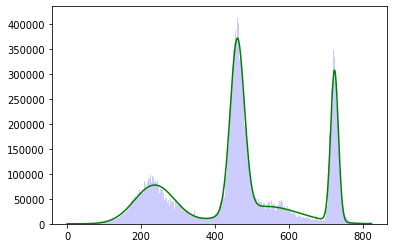

In [ ]:
ms=[232.37,460.27,553.03,722.86]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, random_state=0,means_init=ms).fit(arr_ind)

n, bins, patches = plt.hist(arr_ind, df_ind['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_ind['date'].min(),df_ind['date'].max(),500).reshape(500,1)

Y1 = arr_ind.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_ind.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_ind.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y2b = arr_ind.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

ior = Y1/max(Y1)+(Y2+Y2b)/max(Y2+Y2b)+Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[3] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
y2 = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
y3 = 100*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
y2b = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

new_india_overall = y1+y2+y3+y2b
plt.plot(x,new_india_overall*arr_ind.size/100, c='green')

[[1.07461155]]


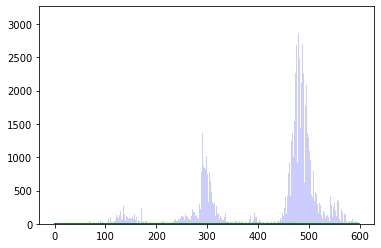

In [ ]:
ms=[139.873,257.044,299.802,482.366,499.212]
ms=np.array(ms)
ms=ms.reshape(5,1)
sum=0.059+0.032+0.169+0.307+0.194
ws=[0.059/sum,0.032/sum,0.169/sum,0.307/sum,0.194/sum]
ws=np.array(ws)
g=GaussianMixture(n_components=5, random_state=0,means_init=ms,weights_init=ws).fit(arr_zim)

n, bins, patches = plt.hist(arr_zim, df_zim['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_zim['date'].min(),df_zim['date'].max(),500).reshape(500,1)

Y1 = arr_zim.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_zim.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_zim.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y4 = arr_zim.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y5 = arr_zim.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

zor = Y1/max(Y1)+(Y2+Y3)/max(Y2+Y3)+(Y4+Y5)/max(Y4+Y5)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
y2 = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
y3 = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
y4 = 100*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
y5 = 100*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

new_zim_overall = y1+y2+y3+y4+y5

plt.plot(x,new_zim_overall, c='green')

[[1.24289448]]


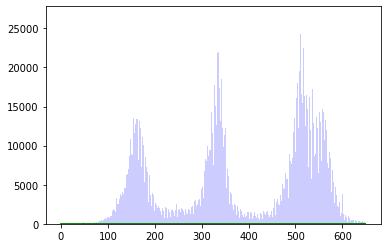

In [ ]:
ms=[145.41,164.50,332.79,506.20,538.45,566.85]
ms=np.array(ms)
ms=ms.reshape(6,1)
g=GaussianMixture(n_components=6, random_state=0,means_init=ms).fit(arr_sa)

n, bins, patches = plt.hist(arr_sa, df_sa['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_sa['date'].min(),df_sa['date'].max(),500).reshape(500,1)

Y1 = arr_sa.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y1b = arr_sa.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2 = arr_sa.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_sa.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = arr_sa.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))
Y3c = arr_sa.size*g.weights_[5]*stats.norm.pdf(x,g.means_[5],np.sqrt(g.covariances_[5]))

saor = (Y1+Y1b)/max(Y1+Y1b)+Y2/max(Y2)+(Y3+Y3b+Y3c)/max(Y3+Y3b+Y3c)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[5] - g.means_[0] + 3*np.sqrt(g.covariances_[5]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
y1b = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
y2 = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
y3 = 100*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
y3b = 100*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))
y3c = 100*g.weights_[5]*stats.norm.pdf(x,g.means_[5],np.sqrt(g.covariances_[5]))

new_sa_overall = y1+y1b+y2+y3+y3b+y3c

plt.plot(x,new_sa_overall, c='green')

[[1.10264032]]


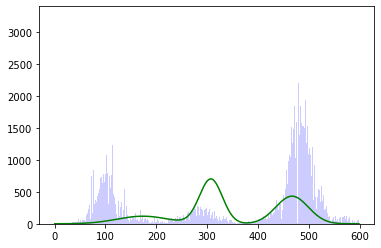

In [ ]:
ms=[104.08,282.89,486.08]
ms=np.array(ms)
ms=ms.reshape(3,1)
g=GaussianMixture(n_components=3, random_state=0,means_init=ms).fit(arr_afg)

n, bins, patches = plt.hist(arr_afg, df_afg['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_afg['date'].min(),df_afg['date'].max(),500).reshape(500,1)

Y1 = arr_afg.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_afg.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_afg.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

afgor = Y1/max(Y1)+Y2/max(Y2)+Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[2] - g.means_[0] + 3*np.sqrt(g.covariances_[2]))/500
print(dist)

Y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))


new_afg_overall = y1+y2+y3
plt.plot(x,new_afg_overall*arr_afg.size/100, c='green')

[[1.45230705]]


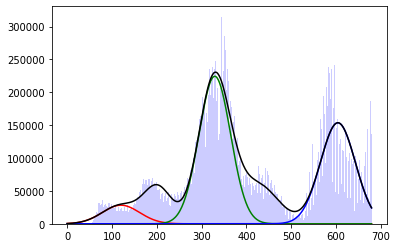

In [ ]:
ms=[109.31,205.33,332,431.90,603.21]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5, means_init=ms).fit(arr_us)

n, bins, patches = plt.hist(arr_us, df_us['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_us['date'].min(),df_us['date'].max(),500).reshape(500,1)

Y1 = arr_us.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y1b = arr_us.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2 = arr_us.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y2b = arr_us.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3 = arr_us.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

plt.plot(x,Y1, c='red')
plt.plot(x,Y2, c='green')
plt.plot(x,Y3, c='blue')

usor = (Y1+Y1b)/max(Y1+Y1b) + (Y2+Y2b)/max(Y2+Y2b) + Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[4]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
y1b = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
y2 = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
y2b = 100*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
y3 = 100*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

new_us_overall = y1 + y1b + y2 + y2b + y3
plt.plot(x,new_us_overall*arr_us.size/100,c="black")

[[1.23524018]]


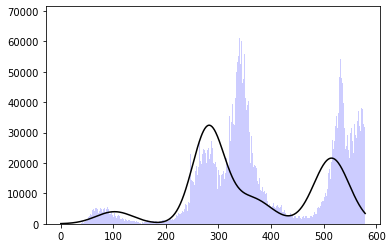

In [ ]:
ms=[85,275,330,520]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, means_init=ms).fit(arr_uk)

n, bins, patches = plt.hist(arr_uk, df_uk['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_uk['date'].min(),df_uk['date'].max(),500).reshape(500,1)

Y1 = arr_uk.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_uk.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = arr_uk.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_uk.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))

ukor = Y1/max(Y1) + (Y2+Y2b)/max(Y2+Y2b) + Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[3] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

Y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = 100*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))

new_uk_overall = y1 + y2 + y2b + y3

plt.plot(x,new_uk_overall*arr_uk.size/100,c="black")

[[1.14191169]]


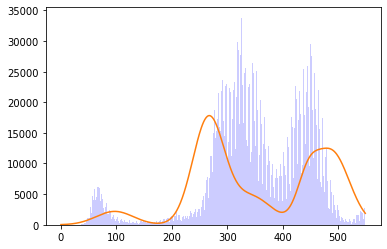

In [ ]:
ms=[73.66,294.90,337.85,442,447]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5, means_init=ms).fit(arr_ger)

n, bins, patches = plt.hist(arr_ger, df_ger['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_ger['date'].min(),df_ger['date'].max(),500).reshape(500,1)

Y1 = arr_ger.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_ger.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = arr_ger.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_ger.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = arr_ger.size*g.weights_[4]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[4]))

gor = Y1/max(Y1) + (Y2+Y2b)/max(Y2+Y2b) + (Y3+Y3b)/max(Y3+Y3b)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[4]))/500
print(dist)

Y1 = 100*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = 100*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = 100*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = 100*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = 100*g.weights_[4]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[4]))

new_ger_overall = y1 + y2 + y2b + y3 +y3b
plt.plot(x,new_ger_overall*arr_ger.size/100)

In [ ]:
print(zor.shape)
print(new_zim_overall.shape)

(500, 1)
(500, 1)


In [ ]:
ior = np.ravel(ior)
zor = np.ravel(zor)
saor = np.ravel(saor)
afgor = np.ravel(afgor)
usor = np.ravel(usor)
ukor = np.ravel(ukor)
gor = np.ravel(gor)
new_india_overall = np.ravel(new_india_overall)
new_zim_overall = np.ravel(new_zim_overall)
new_sa_overall = np.ravel(new_sa_overall)
new_afg_overall = np.ravel(new_afg_overall)
new_us_overall = np.ravel(new_us_overall)
new_uk_overall = np.ravel(new_uk_overall)
new_ger_overall = np.ravel(new_ger_overall)

In [ ]:
print(zor.shape)
print(new_zim_overall.shape)

(500,)
(500,)


In [ ]:
print("Ind vs Zim : ",ks_2samp(ior, zor))
print("Ind vs SA : ",ks_2samp(ior, saor))
print("Ind vs Afg : ",ks_2samp(ior, afgor))
print("Ind vs USA : ",ks_2samp(ior, usor))
print("Ind vs UK : ",ks_2samp(ior, ukor))
print("Ind vs Ger : ",ks_2samp(ior, gor))
print("\n")
print("Ind vs Zim : ",ks_2samp(new_india_overall, new_zim_overall))
print("Ind vs SA : ",ks_2samp(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",ks_2samp(new_india_overall, new_afg_overall))
print("Ind vs USA : ",ks_2samp(new_india_overall, new_us_overall))
print("Ind vs UK : ",ks_2samp(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",ks_2samp(new_india_overall, new_ger_overall))

Ind vs Zim :  Ks_2sampResult(statistic=0.094, pvalue=0.02406614705241275)
Ind vs SA :  Ks_2sampResult(statistic=0.174, pvalue=5.009206937519233e-07)
Ind vs Afg :  Ks_2sampResult(statistic=0.236, pvalue=1.2717086973677652e-12)
Ind vs USA :  Ks_2sampResult(statistic=0.434, pvalue=1.1311548920484481e-42)
Ind vs UK :  Ks_2sampResult(statistic=0.238, pvalue=7.848024594418195e-13)
Ind vs Ger :  Ks_2sampResult(statistic=0.256, pvalue=8.416140722635984e-15)


Ind vs Zim :  Ks_2sampResult(statistic=0.104, pvalue=0.008922221390371415)
Ind vs SA :  Ks_2sampResult(statistic=0.214, pvalue=1.9471481091760016e-10)
Ind vs Afg :  Ks_2sampResult(statistic=0.11, pvalue=0.004686682589297701)
Ind vs USA :  Ks_2sampResult(statistic=0.28, pvalue=1.1605588232289023e-17)
Ind vs UK :  Ks_2sampResult(statistic=0.136, pvalue=0.00018890883025504186)
Ind vs Ger :  Ks_2sampResult(statistic=0.18, pvalue=1.714405022928302e-07)


In [ ]:
from scipy.stats import epps_singleton_2samp as epps
print("Ind vs Zim : ",epps(ior, zor))
print("Ind vs SA : ",epps(ior, saor))
print("Ind vs Afg : ",epps(ior, afgor))
print("Ind vs USA : ",epps(ior, usor))
print("Ind vs UK : ",epps(ior, ukor))
print("Ind vs Ger : ",epps(ior, gor))
print("\n")
print("Ind vs Zim : ",epps(new_india_overall, new_zim_overall))
print("Ind vs SA : ",epps(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",epps(new_india_overall, new_afg_overall))
print("Ind vs USA : ",epps(new_india_overall, new_us_overall))
print("Ind vs UK : ",epps(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",epps(new_india_overall, new_ger_overall))

Ind vs Zim :  Epps_Singleton_2sampResult(statistic=6.116558375224596, pvalue=0.19061108152019626)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=14.823573916550323, pvalue=0.005081478447884015)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=50.89635753785516, pvalue=2.3463465558306747e-10)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=271.52022176672796, pvalue=1.5000040271262235e-57)
Ind vs UK :  Epps_Singleton_2sampResult(statistic=54.019069795372246, pvalue=5.214515137385852e-11)
Ind vs Ger :  Epps_Singleton_2sampResult(statistic=70.12575693512879, pvalue=2.1352353468740725e-14)


Ind vs Zim :  Epps_Singleton_2sampResult(statistic=12.899316636673865, pvalue=0.011778373888557335)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=144.70445626630865, pvalue=2.7748523470840586e-30)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=64.61785346399554, pvalue=3.097219916566513e-13)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=163.14026714866085, pvalue=3.1000170876012674

In [ ]:
from scipy.stats import brunnermunzel as bmz
print("Ind vs Zim : ",bmz(ior, zor))
print("Ind vs SA : ",bmz(ior, saor))
print("Ind vs Afg : ",bmz(ior, afgor))
print("Ind vs USA : ",bmz(ior, usor))
print("Ind vs UK : ",bmz(ior, ukor))
print("Ind vs Ger : ",bmz(ior, gor))
print("\n")
print("Ind vs Zim : ",bmz(new_india_overall, new_zim_overall))
print("Ind vs SA : ",bmz(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",bmz(new_india_overall, new_afg_overall))
print("Ind vs USA : ",bmz(new_india_overall, new_us_overall))
print("Ind vs UK : ",bmz(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",bmz(new_india_overall, new_ger_overall))

Ind vs Zim :  BrunnerMunzelResult(statistic=-2.342002621671666, pvalue=0.01937708983839647)
Ind vs SA :  BrunnerMunzelResult(statistic=3.5147968829065652, pvalue=0.00045993310047842684)
Ind vs Afg :  BrunnerMunzelResult(statistic=6.800982800031113, pvalue=1.7927659357042103e-11)
Ind vs USA :  BrunnerMunzelResult(statistic=15.273107137417918, pvalue=0.0)
Ind vs UK :  BrunnerMunzelResult(statistic=6.90576453366317, pvalue=8.889555758173628e-12)
Ind vs Ger :  BrunnerMunzelResult(statistic=7.536099291541836, pvalue=1.0857981180834031e-13)


Ind vs Zim :  BrunnerMunzelResult(statistic=-1.3910776986819764, pvalue=0.16451247064524252)
Ind vs SA :  BrunnerMunzelResult(statistic=4.112583956969011, pvalue=4.237909158488762e-05)
Ind vs Afg :  BrunnerMunzelResult(statistic=-1.0434782382322805, pvalue=0.29698019278053883)
Ind vs USA :  BrunnerMunzelResult(statistic=8.753157827466616, pvalue=0.0)
Ind vs UK :  BrunnerMunzelResult(statistic=3.1845434063306595, pvalue=0.0014948239868983748)
Ind vs Ger 

In [ ]:
! pip install similaritymeasures
import similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 13.6 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=bf5dc46accb4988d30542b19acaf6924209c778369f7c4cae43751ce836aacec
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


In [ ]:
print("Ind vs Zim : ",similaritymeasures.frechet_dist(ior, zor))
print("Ind vs SA : ",similaritymeasures.frechet_dist(ior, saor))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(ior, afgor))
print("Ind vs USA : ",similaritymeasures.frechet_dist(ior, usor))
print("Ind vs UK : ",similaritymeasures.frechet_dist(ior, ukor))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(ior, gor))
print("\n")
print("Ind vs Zim : ",similaritymeasures.frechet_dist(new_india_overall, new_zim_overall))
print("Ind vs SA : ",similaritymeasures.frechet_dist(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(new_india_overall, new_afg_overall))
print("Ind vs USA : ",similaritymeasures.frechet_dist(new_india_overall, new_us_overall))
print("Ind vs UK : ",similaritymeasures.frechet_dist(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(new_india_overall, new_ger_overall))

Ind vs Zim :  0.04182662863406528
Ind vs SA :  0.04750681548377589
Ind vs Afg :  0.04644043537524245
Ind vs USA :  0.4786220163174727
Ind vs UK :  0.2980805931808686
Ind vs Ger :  0.33682082833983984


Ind vs Zim :  0.8835912270866341
Ind vs SA :  0.3496394191464728
Ind vs Afg :  0.4184109471205992
Ind vs USA :  0.3614227499707602
Ind vs UK :  0.3691729405145813
Ind vs Ger :  0.3691729405145813


In [ ]:
x=np.array(range(500))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))

Ind vs Zim :  3.6808012789824054
Ind vs SA :  4.377087400363241
Ind vs Afg :  4.529255206218274
Ind vs USA :  8.513384247159282
Ind vs UK :  11.038448085271447
Ind vs Ger :  14.359887248553608


Ind vs Zim :  29.75223140558427
Ind vs SA :  15.249951372820062
Ind vs Afg :  11.543812623802893
Ind vs USA :  12.484527007637293
Ind vs UK :  13.178100773705301
Ind vs Ger :  12.960909416571742


In [ ]:
x=np.array(range(500))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))

Ind vs Zim :  19.939858943725604
Ind vs SA :  15.664463677908707
Ind vs Afg :  17.170868471519714
Ind vs USA :  52.542120210853135
Ind vs UK :  28.52212478654105
Ind vs Ger :  48.578658938805454


Ind vs Zim :  54.48609777687524
Ind vs SA :  46.83007477320619
Ind vs Afg :  24.774015372462518
Ind vs USA :  20.154980833588723
Ind vs UK :  20.027897595646845
Ind vs Ger :  19.832626870553042


In [ ]:
x=np.array(range(500))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])

Ind vs Zim :  135.5672344557471
Ind vs SA :  142.70877187431014
Ind vs Afg :  199.98977663460076
Ind vs USA :  157.08373979846348
Ind vs UK :  208.44007428482777
Ind vs Ger :  224.30856257003208


Ind vs Zim :  101.03133804410427
Ind vs SA :  69.96455204178112
Ind vs Afg :  57.93483325391992
Ind vs USA :  59.08789242775861
Ind vs UK :  64.23739019130512
Ind vs Ger :  69.33763104652843


In [ ]:
x=np.array(range(500))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))

Ind vs Zim :  135.56396981923356
Ind vs SA :  142.70762007988296
Ind vs Afg :  199.98948555940825
Ind vs USA :  157.00023345363127
Ind vs UK :  208.28976001828175
Ind vs Ger :  224.29886389502417


Ind vs Zim :  101.02536499101807
Ind vs SA :  69.96411641274162
Ind vs Afg :  57.93441087950797
Ind vs USA :  59.06264027191736
Ind vs UK :  64.21214250356454
Ind vs Ger :  69.31238333243297


In [ ]:
print("Ind vs Zim : ",np.corrcoef(ior, zor)[0,1])
print("Ind vs SA : ",np.corrcoef(ior, saor)[0,1])
print("Ind vs Afg : ",np.corrcoef(ior, afgor)[0,1])
print("Ind vs USA : ",np.corrcoef(ior, usor)[0,1])
print("Ind vs UK : ",np.corrcoef(ior, ukor)[0,1])
print("Ind vs Ger : ",np.corrcoef(ior, gor)[0,1])
print("\n")
print("Ind vs Zim : ",np.corrcoef(new_india_overall, new_zim_overall)[0,1])
print("Ind vs SA : ",np.corrcoef(new_india_overall, new_sa_overall)[0,1])
print("Ind vs Afg : ",np.corrcoef(new_india_overall, new_afg_overall)[0,1])
print("Ind vs USA : ",np.corrcoef(new_india_overall, new_us_overall)[0,1])
print("Ind vs UK : ",np.corrcoef(new_india_overall, new_uk_overall)[0,1])
print("Ind vs Ger : ",np.corrcoef(new_india_overall, new_ger_overall)[0,1])

Ind vs Zim :  0.23123021698269122
Ind vs SA :  0.2633449943100264
Ind vs Afg :  -0.11271458850994522
Ind vs USA :  0.509775771630028
Ind vs UK :  -0.10671726526241458
Ind vs Ger :  -0.18781015639407872


Ind vs Zim :  -0.08113207832849284
Ind vs SA :  0.2215677866707335
Ind vs Afg :  0.2495773378396331
Ind vs USA :  0.30959906179628666
Ind vs UK :  0.29269412295707836
Ind vs Ger :  0.25455827223490296


In [ ]:
from scipy.spatial import procrustes as prc
x=np.array(range(500))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",prc(a,b)[2])
print("Ind vs SA : ",prc(a,c)[2])
print("Ind vs Afg : ",prc(a,d)[2])
print("Ind vs USA : ",prc(a,e)[2])
print("Ind vs UK : ",prc(a,f)[2])
print("Ind vs Ger : ",prc(a,g)[2])
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",prc(a,b)[2])
print("Ind vs SA : ",prc(a,c)[2])
print("Ind vs Afg : ",prc(a,d)[2])
print("Ind vs USA : ",prc(a,e)[2])
print("Ind vs UK : ",prc(a,f)[2])
print("Ind vs Ger : ",prc(a,g)[2])

Ind vs Zim :  7.447129277112512e-06
Ind vs SA :  6.9486562411095155e-06
Ind vs Afg :  9.626813519123311e-06
Ind vs USA :  4.817819000863912e-06
Ind vs UK :  1.0012163280861124e-05
Ind vs Ger :  9.037894271675071e-06


Ind vs Zim :  5.462696231107714e-06
Ind vs SA :  2.177883842623072e-06
Ind vs Afg :  1.7199897275220823e-06
Ind vs USA :  1.6562239159887102e-06
Ind vs UK :  1.7222111869834556e-06
Ind vs Ger :  1.8109165045027188e-06


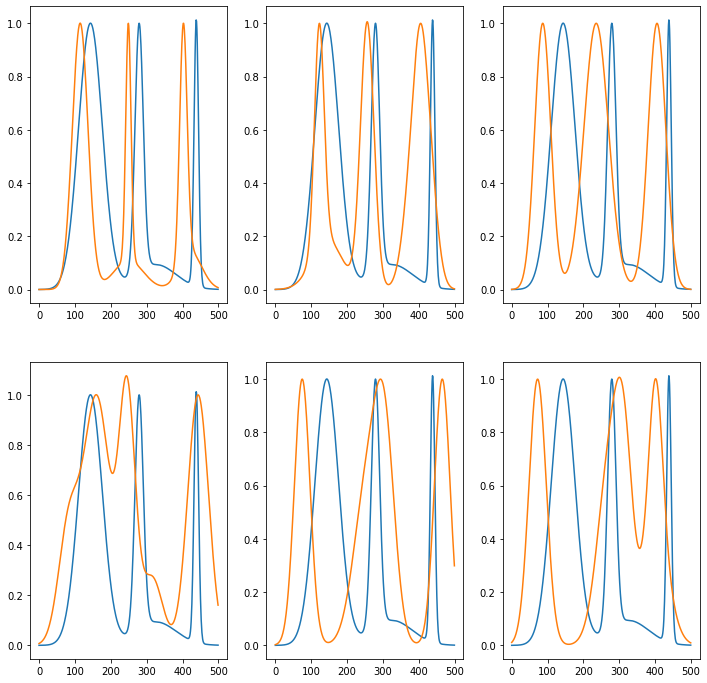

In [ ]:
x=np.array(range(500))

plt.rcParams['figure.figsize'] = [12, 12]

plt.subplot(2, 3, 1)
plt.plot(x,ior)
plt.plot(x,zor)

plt.subplot(2, 3, 2)
plt.plot(x,ior)
plt.plot(x,saor)

plt.subplot(2, 3, 3)
plt.plot(x,ior)
plt.plot(x,afgor)

plt.subplot(2, 3, 4)
plt.plot(x,ior)
plt.plot(x,usor)

plt.subplot(2, 3, 5)
plt.plot(x,ior)
plt.plot(x,ukor)

plt.subplot(2, 3, 6)
plt.plot(x,ior)
plt.plot(x,gor)

plt.show()

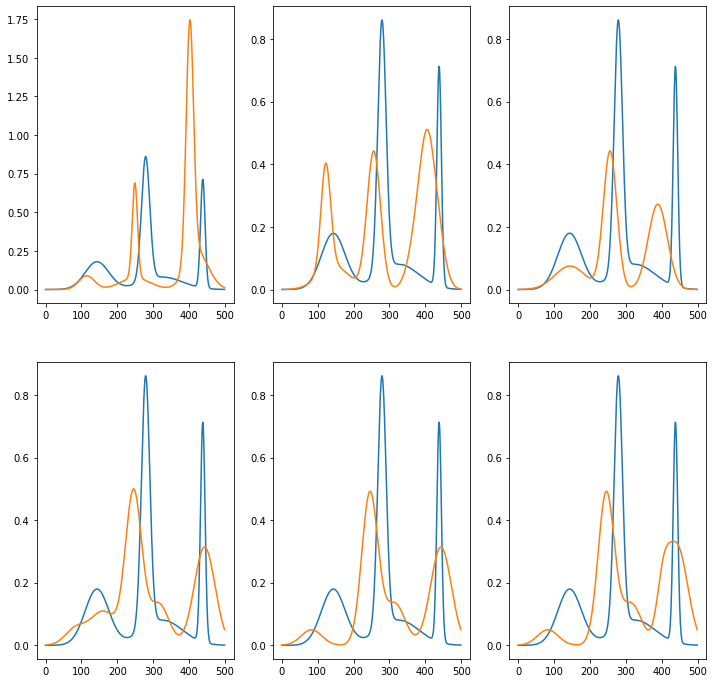

In [ ]:
x=np.array(range(500))

plt.subplot(2, 3, 1)
plt.plot(x,new_india_overall)
plt.plot(x,new_zim_overall)

plt.subplot(2, 3, 2)
plt.plot(x,new_india_overall)
plt.plot(x,new_sa_overall)

plt.subplot(2, 3, 3)
plt.plot(x,new_india_overall)
plt.plot(x,new_afg_overall)

plt.subplot(2, 3, 4)
plt.plot(x,new_india_overall)
plt.plot(x,new_us_overall)

plt.subplot(2, 3, 5)
plt.plot(x,new_india_overall)
plt.plot(x,new_uk_overall)

plt.subplot(2, 3, 6)
plt.plot(x,new_india_overall)
plt.plot(x,new_ger_overall)

plt.show()